# Case Study - Spam Detection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the data

In [3]:
data = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/email_data.csv")

In [4]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [5]:
data.shape

(5171, 4)

In [6]:
data.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


### Exploratory Data Analysis

In [7]:
data['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [8]:
data['label'].value_counts(normalize=True)

ham     0.710114
spam    0.289886
Name: label, dtype: float64

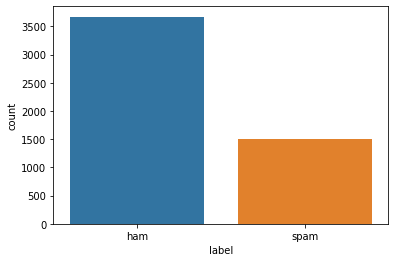

In [9]:
sns.countplot(x='label', data=data)

### Data Preparation - Split the data into train and test set

In [10]:
data.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [11]:
data = data.drop('Unnamed: 0', axis=1)

data.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\nthis deal is to ...,0


In [12]:
y = data['label']
X = data[['text']]

In [13]:
# Splitting into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [14]:
X_train.head()

,text
2666,Subject: half day of vac on 2 / 28\n12 . 20 de...
3687,Subject: re : august 2000 estimated availabili...
4749,Subject: bayer - march 2001 volumes\njust want...
2954,"Subject: meter 6315\ndaren ,\ni have some flow..."
4316,Subject: re : meter # : 1266 ; august 2000 / a...


In [15]:
X_train.shape

(3878, 1)

### Data Prepration - Text Preprocessing

In [16]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [17]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [18]:
## We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

In [19]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words                
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [20]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
from tqdm import tqdm, tqdm_notebook

In [24]:
tqdm.pandas()

In [25]:
temp_df = X_train['text'].progress_apply(lambda x: preprocess(x, 'stem'))

temp_df.head()

100%|██████████| 3878/3878 [01:31<00:00, 42.36it/s]


,0,1
2666,subject half day vac dentist appt,6
3687,subject august estim avail victor lamadrid ect...,168
4749,subject bayer march volum want make sure volum...,28
2954,subject meter daren flow referenc meter withou...,29
4316,subject meter august alloc except lauri fluctu...,582


In [27]:
temp_df.columns = ['clean_text_stem', 'text_length_stem']

temp_df.head()

,clean_text_stem,text_length_stem
2666,subject half day vac dentist appt,6
3687,subject august estim avail victor lamadrid ect...,168
4749,subject bayer march volum want make sure volum...,28
2954,subject meter daren flow referenc meter withou...,29
4316,subject meter august alloc except lauri fluctu...,582


In [28]:
X_train = pd.concat([X_train, temp_df], axis=1)

X_train.head()

,text,clean_text_stem,text_length_stem
2666,Subject: half day of vac on 2 / 28\n12 . 20 de...,subject half day vac dentist appt,6
3687,Subject: re : august 2000 estimated availabili...,subject august estim avail victor lamadrid ect...,168
4749,Subject: bayer - march 2001 volumes\njust want...,subject bayer march volum want make sure volum...,28
2954,"Subject: meter 6315\ndaren ,\ni have some flow...",subject meter daren flow referenc meter withou...,29
4316,Subject: re : meter # : 1266 ; august 2000 / a...,subject meter august alloc except lauri fluctu...,582


In [30]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [31]:
temp_df = X_train['text'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

100%|██████████| 3878/3878 [01:24<00:00, 45.69it/s]


,0,1
2666,subject half day vac dentist appt,6
3687,subject august estimated availability victor l...,168
4749,subject bayer march volume want make sure volu...,28
2954,subject meter daren flow referenced meter with...,29
4316,subject meter august allocation exception laur...,582


In [32]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']

temp_df.head()

,clean_text_lemma,text_length_lemma
2666,subject half day vac dentist appt,6
3687,subject august estimated availability victor l...,168
4749,subject bayer march volume want make sure volu...,28
2954,subject meter daren flow referenced meter with...,29
4316,subject meter august allocation exception laur...,582


In [33]:
X_train = pd.concat([X_train, temp_df], axis=1)

X_train.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
2666,Subject: half day of vac on 2 / 28\n12 . 20 de...,subject half day vac dentist appt,6,subject half day vac dentist appt,6
3687,Subject: re : august 2000 estimated availabili...,subject august estim avail victor lamadrid ect...,168,subject august estimated availability victor l...,168
4749,Subject: bayer - march 2001 volumes\njust want...,subject bayer march volum want make sure volum...,28,subject bayer march volume want make sure volu...,28
2954,"Subject: meter 6315\ndaren ,\ni have some flow...",subject meter daren flow referenc meter withou...,29,subject meter daren flow referenced meter with...,29
4316,Subject: re : meter # : 1266 ; august 2000 / a...,subject meter august alloc except lauri fluctu...,582,subject meter august allocation exception laur...,582


In [34]:
X_train.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
2666,Subject: half day of vac on 2 / 28\n12 . 20 de...,subject half day vac dentist appt,6,subject half day vac dentist appt,6
3687,Subject: re : august 2000 estimated availabili...,subject august estim avail victor lamadrid ect...,168,subject august estimated availability victor l...,168
4749,Subject: bayer - march 2001 volumes\njust want...,subject bayer march volum want make sure volum...,28,subject bayer march volume want make sure volu...,28
2954,"Subject: meter 6315\ndaren ,\ni have some flow...",subject meter daren flow referenc meter withou...,29,subject meter daren flow referenced meter with...,29
4316,Subject: re : meter # : 1266 ; august 2000 / a...,subject meter august alloc except lauri fluctu...,582,subject meter august allocation exception laur...,582


### Creating the WordCloud

In [35]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
from wordcloud import WordCloud

In [37]:
y_train

2666     ham
3687     ham
4749     ham
2954     ham
4316     ham
        ... 
4931    spam
3264    spam
1653    spam
2607     ham
2732     ham
Name: label, Length: 3878, dtype: object

In [38]:
spam_df = X_train.loc[y_train=='spam', :]

spam_df.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
3489,Subject: software\nmicrosoft windows xp profes...,subject softwar microsoft window xp profession...,118,subject software microsoft window xp professio...,118
2545,Subject: fw : nice neighbour girl cumming movi...,subject fw nice neighbour girl cum movi boo mu...,10,subject fw nice neighbour girl cumming movie b...,10
1596,Subject: circle of friends = )\nhi my new frie...,subject circl friend hi new friend want see ph...,23,subject circle friend hi new friend want see p...,23
345,Subject: send out five motor\natt : client id ...,subject send five motor att client id refer ca...,38,subject send five motor att client id referrin...,38
3088,Subject: simple and quick\npone line service\n...,subject simpl quick pone line servic cat ego t...,64,subject simple quick pone line service cat ego...,64


In [39]:
words = ' '.join(spam_df['clean_text_lemma'])

print(words[:100])

subject software microsoft window xp professional retail price low price save adobe photoshop retail


In [40]:
spam_df = X_train.loc[y_train=='spam', :]

words = ' '.join(spam_df['clean_text_lemma'])

cleaned_word = " ".join([word for word in words.split() 
                        if 'subject' not in word])

In [41]:
spam_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

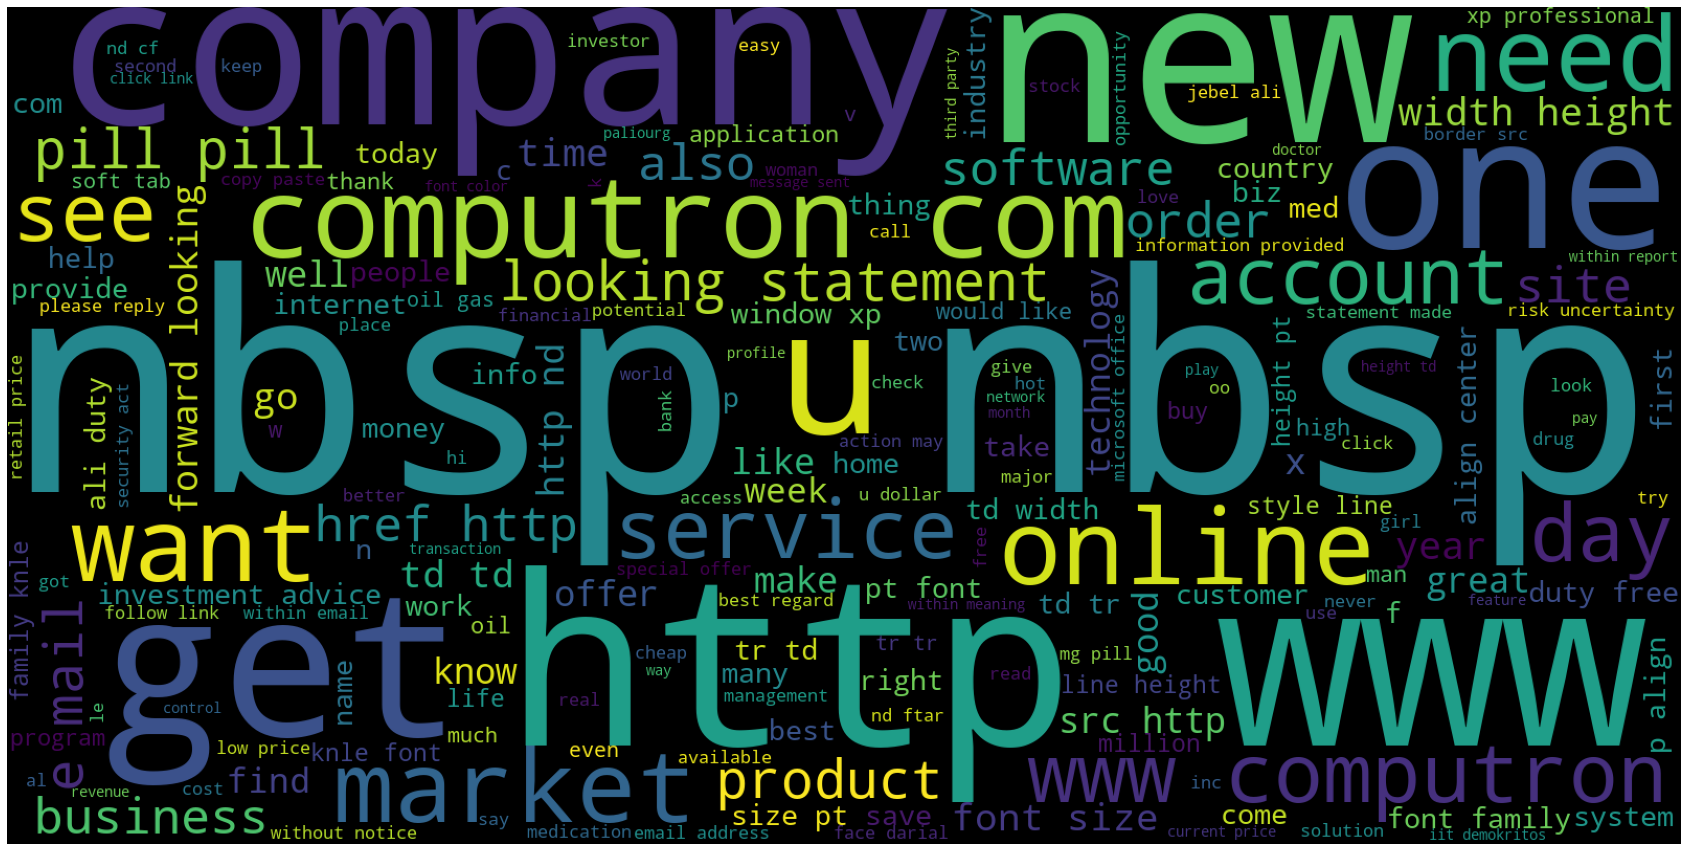

In [42]:
plt.figure(1,figsize=(30,20))
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.show()

In [43]:
ham_df = X_train.loc[y_train=='ham', :]

words = ' '.join(ham_df['clean_text_lemma'])

cleaned_word = " ".join([word for word in words.split() 
                        if 'subject' not in word])

In [44]:
ham_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

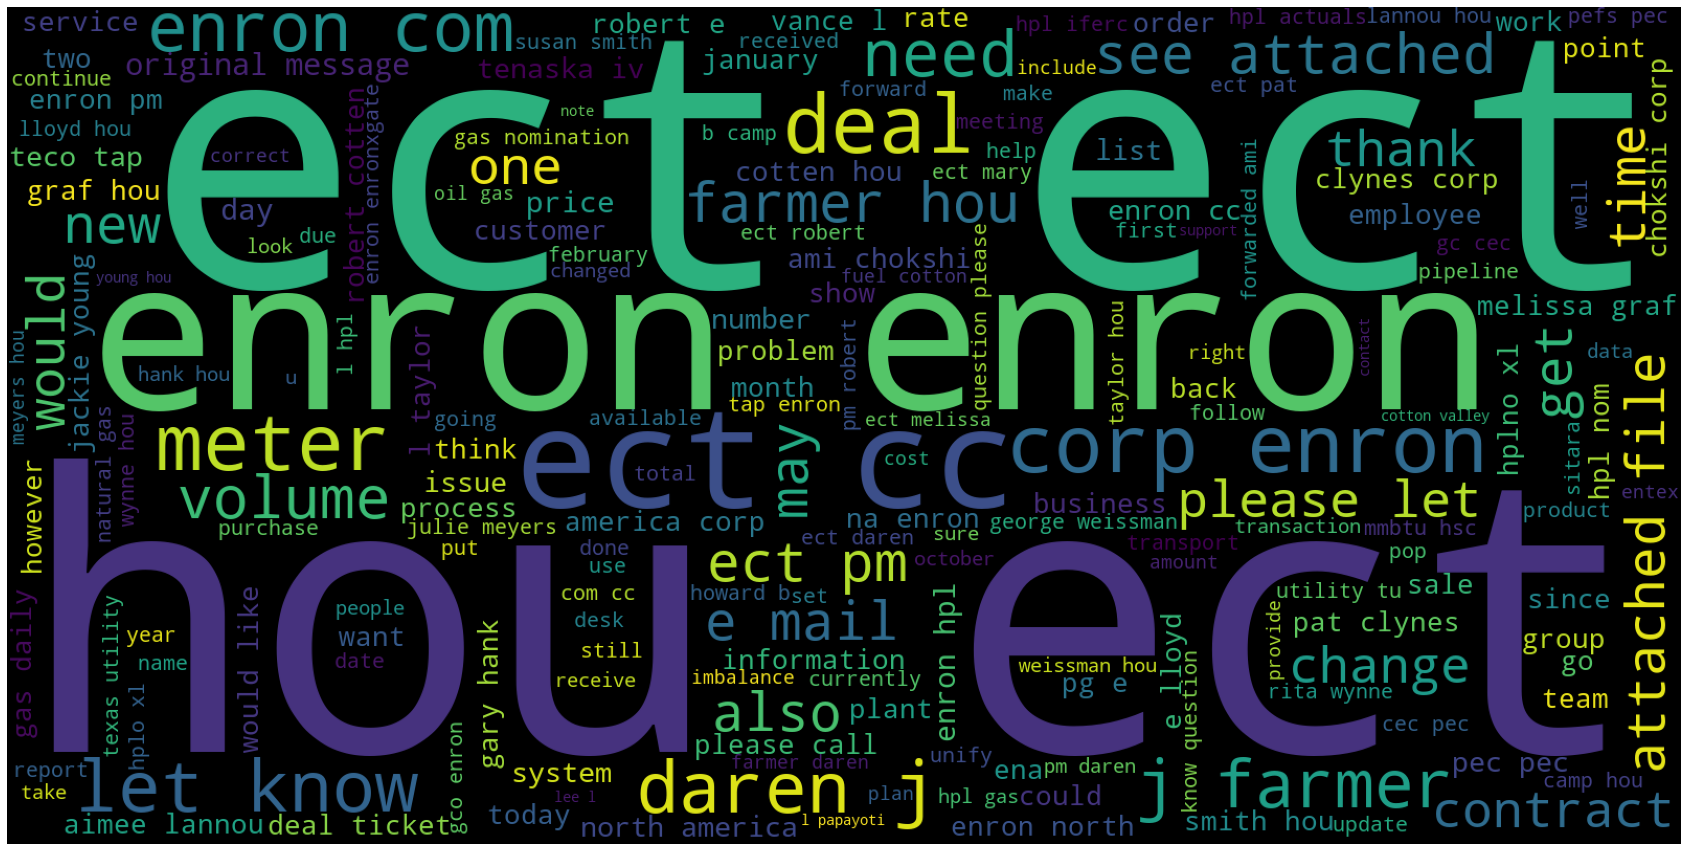

In [45]:
plt.figure(1,figsize=(30,20))
plt.imshow(ham_wordcloud)
plt.axis('off')
plt.show()

### Converting Text to Numerical vectors - BOW Representation

In [46]:
X_train.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
2666,Subject: half day of vac on 2 / 28\n12 . 20 de...,subject half day vac dentist appt,6,subject half day vac dentist appt,6
3687,Subject: re : august 2000 estimated availabili...,subject august estim avail victor lamadrid ect...,168,subject august estimated availability victor l...,168
4749,Subject: bayer - march 2001 volumes\njust want...,subject bayer march volum want make sure volum...,28,subject bayer march volume want make sure volu...,28
2954,"Subject: meter 6315\ndaren ,\ni have some flow...",subject meter daren flow referenc meter withou...,29,subject meter daren flow referenced meter with...,29
4316,Subject: re : meter # : 1266 ; august 2000 / a...,subject meter august alloc except lauri fluctu...,582,subject meter august allocation exception laur...,582


In [47]:
from sklearn.feature_extraction.text import CountVectorizer

vocab = CountVectorizer()

X_train_bow = vocab.fit_transform(X_train['clean_text_lemma'])

In [48]:
X_train_bow

<3878x35252 sparse matrix of type '<class 'numpy.int64'>'
	with 236489 stored elements in Compressed Sparse Row format>

In [49]:
print("Total unique words:", len(vocab.vocabulary_))

print("Type of train features:", type(X_train_bow))

print("Shape of input data:", X_train_bow.shape)

Total unique words: 35252
Type of train features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data: (3878, 35252)


In [50]:
print(X_train_bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [51]:
from sys import getsizeof

print(type(X_train_bow))
print(getsizeof(X_train_bow), "Bytes")

<class 'scipy.sparse.csr.csr_matrix'>
48 Bytes


In [52]:
from sys import getsizeof

print(type(X_train_bow.toarray()))
print(getsizeof(X_train_bow.toarray()), "Bytes")

<class 'numpy.ndarray'>
1093658168 Bytes


### Preprocessing the Test Data

In [53]:
X_test.head()

,text
1789,Subject: ship channel hub co\nplease review / ...
2277,Subject: feb 2000 intercompany accrual varianc...
2618,"Subject: meter 981318\ndaren ,\nthe above mete..."
3144,Subject: via - ggra is lousy mizar\nanti\ncurb...
3756,Subject: potential list - feb . 2001\ndaren :\...


In [54]:
temp_df = X_test['text'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

100%|██████████| 1293/1293 [00:28<00:00, 45.63it/s]


,0,1
1789,subject ship channel hub co please review comm...,26
2277,subject feb intercompany accrual variance list...,128
2618,subject meter daren meter recorded flow jan ye...,34
3144,subject via ggra lousy mizar anti curb hemisph...,35
3756,subject potential list feb daren aware potenti...,33


In [55]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']

temp_df.head()

,clean_text_lemma,text_length_lemma
1789,subject ship channel hub co please review comm...,26
2277,subject feb intercompany accrual variance list...,128
2618,subject meter daren meter recorded flow jan ye...,34
3144,subject via ggra lousy mizar anti curb hemisph...,35
3756,subject potential list feb daren aware potenti...,33


In [56]:
X_test = pd.concat([X_test, temp_df], axis=1)

X_test.head()

,text,clean_text_lemma,text_length_lemma
1789,Subject: ship channel hub co\nplease review / ...,subject ship channel hub co please review comm...,26
2277,Subject: feb 2000 intercompany accrual varianc...,subject feb intercompany accrual variance list...,128
2618,"Subject: meter 981318\ndaren ,\nthe above mete...",subject meter daren meter recorded flow jan ye...,34
3144,Subject: via - ggra is lousy mizar\nanti\ncurb...,subject via ggra lousy mizar anti curb hemisph...,35
3756,Subject: potential list - feb . 2001\ndaren :\...,subject potential list feb daren aware potenti...,33


In [57]:
X_test_bow = vocab.transform(X_test['clean_text_lemma'])

### Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_bow, y_train)

LogisticRegression()

In [81]:
y_test_pred = classifier.predict(X_test_bow)

In [82]:
lr_score = accuracy_score(y_test, y_test_pred)
lr_score

0.9737045630317092

In [83]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

,Actual,Predicted
1789,ham,ham
2277,ham,ham
2618,ham,ham
3144,spam,spam
3756,ham,ham
1872,ham,ham
142,ham,ham
214,ham,ham
4504,ham,ham
15,spam,spam


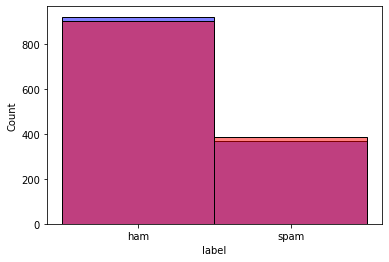

In [84]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [85]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.9737045630317092
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98       923
        spam       0.93      0.98      0.96       370

    accuracy                           0.97      1293
   macro avg       0.96      0.98      0.97      1293
weighted avg       0.97      0.97      0.97      1293



### KNN Classification

In [86]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_bow, y_train)

KNeighborsClassifier()

In [87]:
y_test_pred = classifier.predict(X_test_bow)

In [88]:
knn_score = accuracy_score(y_test, y_test_pred)
knn_score

0.8337200309358082

In [89]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

,Actual,Predicted
1789,ham,spam
2277,ham,ham
2618,ham,ham
3144,spam,spam
3756,ham,spam
1872,ham,spam
142,ham,ham
214,ham,ham
4504,ham,spam
15,spam,spam


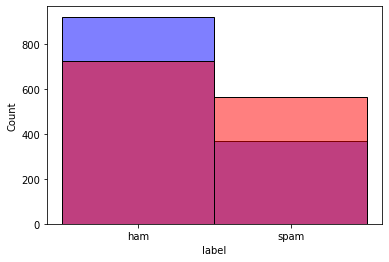

In [90]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [91]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.8337200309358082
              precision    recall  f1-score   support

         ham       0.99      0.78      0.87       923
        spam       0.64      0.98      0.77       370

    accuracy                           0.83      1293
   macro avg       0.81      0.88      0.82      1293
weighted avg       0.89      0.83      0.84      1293



### Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_bow, y_train)

DecisionTreeClassifier()

In [94]:
y_test_pred = classifier.predict(X_test_bow)

In [95]:
dt_score = accuracy_score(y_test, y_test_pred)
dt_score

0.9551430781129157

In [96]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

,Actual,Predicted
1789,ham,ham
2277,ham,ham
2618,ham,ham
3144,spam,spam
3756,ham,ham
1872,ham,ham
142,ham,ham
214,ham,ham
4504,ham,ham
15,spam,spam


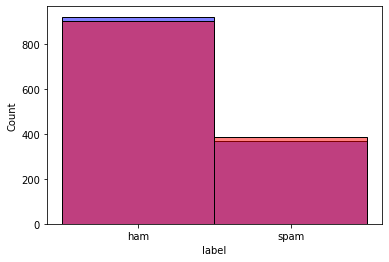

In [97]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [98]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.9551430781129157
              precision    recall  f1-score   support

         ham       0.98      0.96      0.97       923
        spam       0.90      0.95      0.92       370

    accuracy                           0.96      1293
   macro avg       0.94      0.95      0.95      1293
weighted avg       0.96      0.96      0.96      1293



### Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_bow, y_train)

RandomForestClassifier()

In [100]:
y_test_pred = classifier.predict(X_test_bow)

In [101]:
rf_score = accuracy_score(y_test, y_test_pred)
rf_score

0.9767981438515081

In [102]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

,Actual,Predicted
1789,ham,ham
2277,ham,ham
2618,ham,ham
3144,spam,spam
3756,ham,ham
1872,ham,ham
142,ham,ham
214,ham,ham
4504,ham,ham
15,spam,spam


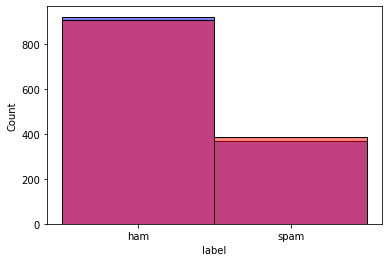

In [103]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [104]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.9767981438515081
              precision    recall  f1-score   support

         ham       0.99      0.98      0.98       923
        spam       0.94      0.98      0.96       370

    accuracy                           0.98      1293
   macro avg       0.97      0.98      0.97      1293
weighted avg       0.98      0.98      0.98      1293



### Support Vector Classifier

In [105]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_bow, y_train)

SVC()

In [106]:
y_test_pred = classifier.predict(X_test_bow)

In [107]:
svc_score = accuracy_score(y_test, y_test_pred)
svc_score

0.9636504253673627

In [108]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

,Actual,Predicted
1789,ham,ham
2277,ham,ham
2618,ham,ham
3144,spam,spam
3756,ham,ham
1872,ham,ham
142,ham,ham
214,ham,ham
4504,ham,ham
15,spam,spam


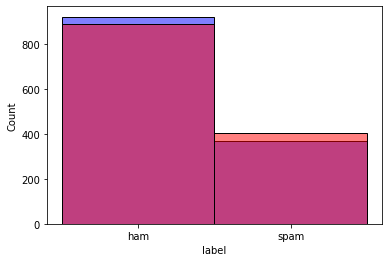

In [109]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [110]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.9636504253673627
              precision    recall  f1-score   support

         ham       0.99      0.96      0.97       923
        spam       0.90      0.98      0.94       370

    accuracy                           0.96      1293
   macro avg       0.95      0.97      0.96      1293
weighted avg       0.97      0.96      0.96      1293



### Gradient Boost Classifier

In [111]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train_bow, y_train)

GradientBoostingClassifier()

In [112]:
y_test_pred = classifier.predict(X_test_bow)

In [113]:
gbc_score = accuracy_score(y_test, y_test_pred)
gbc_score

0.9590100541376644

In [114]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

,Actual,Predicted
1789,ham,ham
2277,ham,ham
2618,ham,ham
3144,spam,spam
3756,ham,ham
1872,ham,ham
142,ham,ham
214,ham,ham
4504,ham,ham
15,spam,spam


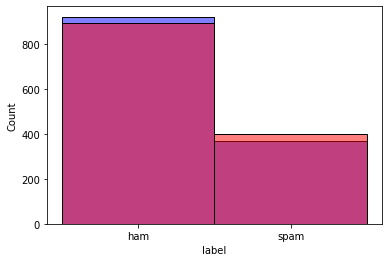

In [115]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [116]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.9590100541376644
              precision    recall  f1-score   support

         ham       0.99      0.96      0.97       923
        spam       0.90      0.97      0.93       370

    accuracy                           0.96      1293
   macro avg       0.94      0.96      0.95      1293
weighted avg       0.96      0.96      0.96      1293



In [117]:
models = [('Logistic Regression',lr_score),
          ('KNN Clasification',knn_score),
          ('Decision Tree Classification',dt_score),
          ('Support Vector Classification',svc_score),
          ('Random Forest Classification',rf_score),
          ('Gradient Boosting Classification',gbc_score)]

In [118]:
predict = pd.DataFrame(data = models, columns=['Algorithm','Accuracy_score'])
predict.sort_values(by = 'Accuracy_score', ascending = False)

,Algorithm,Accuracy_score
4,Random Forest Classification,0.976798
0,Logistic Regression,0.973705
3,Support Vector Classification,0.963650
5,Gradient Boosting Classification,0.959010
2,Decision Tree Classification,0.955143
1,KNN Clasification,0.833720


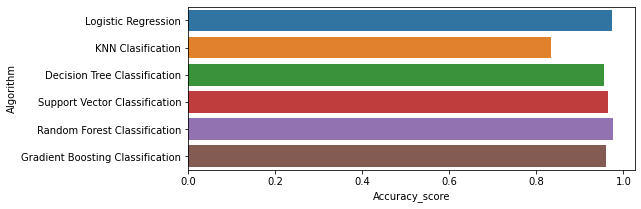

In [119]:
plt.figure(figsize = (8,3))
sns.barplot(x = predict['Accuracy_score'], y = predict['Algorithm'])

Conclusion:

In this project, by using a set of ML algorithms, a computational intelligence approach is applied to detect spam mails. The given dataset was utilised for training and testing the Logistic Regression, KNN Classification, Support Vector Classification, GradientBoosting Classification, Decision Tree and Random Forest Classification, ML algorithms. The classification analysis of this dataset followed the steps of data splitting, preprocessing, Fitting the classification models, and evaluation. The resultant outcome revealed that RandomForest Classification achieved highest accuracy score.